# Sentiment Analysis

https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6

https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px


import seaborn as sns; sns.set()


## loading data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/danalytixx/Machine-Learning/master/data/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.dtypes

Id                        float64
ProductId                  object
UserId                     object
ProfileName                object
HelpfulnessNumerator       object
HelpfulnessDenominator     object
Score                     float64
Time                      float64
Summary                    object
Text                       object
sentiment                   int64
sentimentt                 object
dtype: object

## setting sentiments into two categories

In [ ]:


# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3

score_int=(pd.to_numeric(df['Score']))
#df =  score_int != 3.0
df['sentiment'] = score_int.apply(lambda rating : +1 if rating > 3 else -1)

In [ ]:
df.head(50)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1.0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...,1
5,6.0,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4.0,1.342051e+09,Nice Taffy,I got a wild hair for taffy and ordered this f...,1
6,7.0,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5.0,1.340150e+09,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,1
7,8.0,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5.0,1.336003e+09,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,1
8,9.0,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5.0,1.322006e+09,Yay Barley,Right now I'm mostly just sprouting this so my...,1
9,10.0,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5.0,1.351210e+09,Healthy Dog Food,This is a very healthy dog food. Good for thei...,1


In [ ]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [ ]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})


(array([37002., 11187.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

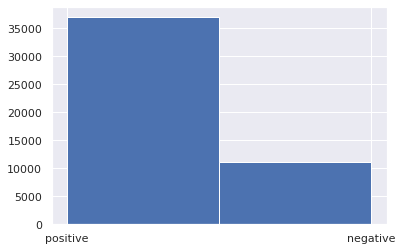

In [ ]:
plt.hist(df['sentimentt'], bins=2)

## training model


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

## vectorizing the words


In [ ]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'].apply(lambda x: np.str_(x)))
test_matrix = vectorizer.transform(test['Summary'].apply(lambda x: np.str_(x)))

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [ ]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[1456,  402],
       [ 909, 7489]])

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.62      0.78      0.69      1858
           1       0.95      0.89      0.92      8398

    accuracy                           0.87     10256
   macro avg       0.78      0.84      0.80     10256
weighted avg       0.89      0.87      0.88     10256

